In [10]:
import sys
sys.path.append('../')

import seaborn as sns
import pandas as pd
import numpy as np
from Functions.pre_processing_functions import *


In [11]:
customer_info = pd.read_csv('../Data/customer_info.csv')
customer_basket = pd.read_csv('../Data/customer_basket.csv')
customer_info = customer_info.drop(columns = ['Unnamed: 0'])
customer_info

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,29930,April Clark,female,01/15/1972 02:27 PM,2.0,2.0,1.0,4.0,7789.0,5601.0,...,1894.0,457.0,412.0,428.0,386.0,0.158741,2018.0,NaN,38.721807,-9.125534
1,6813,Bsc. Paul Ketchum,male,07/31/1944 10:53 AM,0.0,1.0,0.0,4.0,8653.0,35.0,...,346.0,394.0,75.0,226.0,73.0,1.227890,2013.0,971840.0,38.734668,-9.163533
2,39451,Mary Downing,female,11/13/1989 02:11 PM,2.0,3.0,0.0,7.0,15605.0,4275.0,...,1971.0,920.0,335.0,192.0,319.0,0.101598,2011.0,NaN,38.787126,-9.147077
3,21557,Manuel Kueny,male,08/09/1976 06:23 AM,0.0,0.0,1.0,1.0,13440.0,16366.0,...,785.0,139.0,679.0,270.0,221.0,0.259943,2009.0,NaN,38.741816,-9.159700
4,16415,Phd. Curtis Tharp,male,07/11/1966 08:12 AM,1.0,1.0,1.0,5.0,49250.0,3197.0,...,1492.0,1046.0,112.0,144.0,244.0,0.317822,2012.0,925367.0,38.785921,-9.149221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,37071,Mary Diaz,female,01/20/1999 06:47 PM,1.0,1.0,0.0,2.0,62321.0,5250.0,...,1687.0,1048.0,379.0,258.0,163.0,0.162331,2018.0,NaN,38.750813,-9.103808
34056,27422,John Gross,male,08/01/1984 07:50 PM,1.0,1.0,0.0,3.0,16084.0,3796.0,...,568.0,949.0,263.0,319.0,379.0,0.614179,2019.0,985393.0,38.745020,-9.169168
34057,39540,Kathleen Harper,female,09/16/2000 07:22 AM,1.0,0.0,1.0,2.0,14631.0,8784.0,...,1472.0,368.0,804.0,110.0,228.0,0.535617,2018.0,NaN,38.767834,-9.172368
34058,18367,Msc. Jenny Landry,female,04/09/1961 10:52 AM,1.0,1.0,1.0,4.0,37420.0,4702.0,...,904.0,1088.0,401.0,376.0,151.0,0.435014,2015.0,953651.0,38.732462,-9.156155


### Pre-processing analysis of customer_info dataset

<b> Missing Values and Duplicates:

In [4]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34060 entries, 0 to 34059
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_id                              34060 non-null  int64  
 1   customer_name                            34060 non-null  object 
 2   customer_gender                          34060 non-null  object 
 3   customer_birthdate                       33719 non-null  object 
 4   kids_home                                33311 non-null  float64
 5   teens_home                               33277 non-null  float64
 6   number_complaints                        33038 non-null  float64
 7   distinct_stores_visited                  33379 non-null  float64
 8   lifetime_spend_groceries                 34060 non-null  float64
 9   lifetime_spend_electronics               34060 non-null  float64
 10  typical_hour                             32698

In [5]:
def check_missing_values(df):
    #Check for missing values in every column of the dataset
    missing_count = df.isna().sum()
    #Calculate the percenbtage of missing values
    missing_percentage = (missing_count / len(df)) * 100
    #Create a dataframe with missing values and the respective percentage
    missing_df = pd.DataFrame({'Missing Values': missing_count, 'Percentage (%)': round(missing_percentage)})
    #Return the dataframe with only the rows that have missing values
    return missing_df[missing_df['Missing Values'] > 0]

In [6]:
check_missing_values(customer_info)

,Missing Values,Percentage (%)
customer_birthdate,341,1.0
kids_home,749,2.0
teens_home,783,2.0
number_complaints,1022,3.0
distinct_stores_visited,681,2.0
typical_hour,1362,4.0
lifetime_spend_vegetables,1022,3.0
lifetime_spend_alcohol_drinks,681,2.0
lifetime_spend_fish,1703,5.0
loyalty_card_number,10908,32.0


Tirar conclusões

In [7]:
customer_info.duplicated().sum()

0

Check if there is any customer_id duplicated, since every customer should be unique

In [8]:
customer_info['customer_id'].duplicated().sum()


0

In [9]:
customer_info.describe()

,customer_id,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
count,34060.000000,33311.000000,33277.000000,33038.000000,33379.000000,34060.000000,34060.000000,32698.000000,33038.000000,34060.000000,...,32357.000000,34060.000000,34060.000000,34060.000000,34060.000000,34060.000000,34060.000000,23152.000000,34060.000000,34060.000000
mean,20010.854433,1.170244,0.936292,0.832042,2.914078,22818.404698,3816.022343,13.200746,738.642079,478.382854,...,828.842662,711.297534,399.434968,317.755843,156.691339,0.337093,2014.593218,950528.738856,38.747812,-9.156987
std,11557.889072,1.307319,0.759579,0.771205,1.549081,20098.763199,3858.352640,4.681384,679.599323,282.132536,...,655.803300,481.230522,320.221650,150.513835,118.969652,0.322766,4.739037,28904.951217,0.021562,0.024561
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.340710,1995.000000,900009.000000,38.700486,-9.214894
25%,10018.750000,0.000000,0.000000,0.000000,2.000000,9346.000000,860.000000,9.000000,222.000000,231.000000,...,269.000000,338.000000,185.000000,212.000000,62.000000,0.113353,2011.000000,925548.500000,38.730512,-9.175987
50%,19985.500000,1.000000,1.000000,1.000000,3.000000,15877.500000,2958.000000,13.000000,451.000000,453.000000,...,714.000000,634.000000,319.000000,313.000000,122.000000,0.240373,2015.000000,950704.000000,38.747755,-9.157015
75%,30042.250000,1.000000,1.000000,1.000000,4.000000,30428.250000,5309.000000,16.000000,1089.750000,661.000000,...,1269.000000,1001.000000,506.000000,414.000000,235.000000,0.514691,2018.000000,975600.250000,38.764967,-9.140522
max,40000.000000,10.000000,4.000000,4.000000,10.000000,158544.000000,37523.000000,24.000000,5380.000000,1702.000000,...,4043.000000,3286.000000,2176.000000,1007.000000,946.000000,1.952971,2026.000000,999996.000000,38.793672,-9.065429


<b>Outliers

### Pre-Processing of customer_basket dataset

<b> Missing Values and Duplicates:

In [10]:
customer_basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   invoice_id     100000 non-null  int64 
 1   list_of_goods  100000 non-null  object
 2   customer_id    100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [11]:
check_missing_values(customer_basket)

,Missing Values,Percentage (%)


In [12]:
customer_basket.duplicated().sum()

0

Since one customer can <b> buy more than 1 time </b>, is not important to check duplicates of customer_id, only of invoice_id

In [13]:
customer_basket['invoice_id'].duplicated().sum()

372

This duplicates may be due to: <br>
<b> 1. Multiple Customers in One Transaction: </b> If multiple customers contribute to a single purchase (e.g., a shared order), the same invoice_id might appear for different customer_id values.<br>
<b> 2. Multiple Entries per Invoice: </b> If the dataset records each product in a separate row instead of grouping them into a list, the same invoice_id could appear multiple times for the same customer_id.

In [14]:
customer_basket.describe()

,invoice_id,customer_id
count,1.000000e+05,100000.000000
mean,6.124714e+06,16945.569020
std,3.533208e+06,9837.987201
min,2.005400e+04,1.000000
25%,3.066432e+06,8425.000000
50%,6.118618e+06,16917.000000
75%,9.195347e+06,25536.000000
max,1.224222e+07,34060.000000


## Correlation Matrix

In [16]:
feature_selection('customer_info.csv', 'correlation',  threshold=0.01,correlation_threshold=0.80)

customer_id                                 True
customer_gender                             True
kids_home                                   True
teens_home                                  True
number_complaints                           True
distinct_stores_visited                     True
lifetime_spend_groceries                    True
lifetime_spend_electronics                  True
typical_hour                                True
lifetime_spend_vegetables                   True
lifetime_spend_nonalcohol_drinks            True
lifetime_spend_alcohol_drinks               True
lifetime_spend_meat                         True
lifetime_spend_fish                         True
lifetime_spend_hygiene                      True
lifetime_spend_videogames                   True
lifetime_spend_petfood                      True
lifetime_total_distinct_products            True
percentage_of_products_bought_promotion     True
year_first_transaction                      True
loyalty_card_number 

In [17]:
df= preprocess('customer_info.csv')

In [18]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,children,has_children,years_active,customer_educlevel
customer_id,1.000000,0.003711,-0.005427,-0.004282,0.008747,-0.003952,-0.000943,-0.004242,0.002259,0.004029,-0.011130,-0.010240,-0.012809,-0.009021,-0.008425,-0.008403,0.007576,-0.002397,0.004632,-0.006613,-0.670401,-0.001998,0.005595,-0.005662,-0.005766,0.002214,0.006613,-0.727220
customer_gender,0.003711,1.000000,-0.003626,-0.001211,0.002800,0.001595,0.010906,0.004109,-0.003956,-0.002761,-0.004067,0.001436,0.006475,0.001886,-0.004166,0.006174,0.002909,0.002129,0.003077,-0.001624,-0.001849,0.007631,0.000555,0.004976,-0.004066,0.000167,0.001624,-0.004998
kids_home,-0.005427,-0.003626,1.000000,0.472969,0.151036,0.066270,-0.095329,-0.005328,-0.301885,0.050723,0.334174,0.286470,0.256225,0.162900,0.160015,-0.169213,0.044010,0.395183,-0.134139,-0.129842,-0.012065,0.008242,0.014137,-0.020324,0.923497,0.262070,0.129842,-0.010286
teens_home,-0.004282,-0.001211,0.472969,1.000000,0.045680,0.164526,0.043194,-0.057231,-0.262634,-0.102878,0.318937,0.329243,0.489452,0.310277,0.189752,-0.139901,0.153705,0.400045,-0.023522,-0.211047,0.144756,0.017264,0.047974,0.050331,0.763072,0.367109,0.211047,-0.006108
number_complaints,0.008747,0.002800,0.151036,0.045680,1.000000,-0.017299,-0.214900,-0.101285,-0.136837,-0.210609,-0.035697,-0.172571,-0.115117,-0.160953,-0.061642,-0.140213,-0.077289,-0.026890,0.122730,0.029229,-0.085383,-0.009486,-0.101407,-0.073389,0.128424,0.039639,-0.029229,-0.158910
distinct_stores_visited,-0.003952,0.001595,0.066270,0.164526,-0.017299,1.000000,-0.124867,-0.319550,-0.037485,0.024722,0.000289,-0.237184,-0.034234,-0.157830,0.157752,-0.365107,0.018540,0.065094,0.171734,-0.152952,0.186044,-0.006051,0.035066,0.068725,0.116806,0.184954,0.152952,-0.049053
lifetime_spend_groceries,-0.000943,0.010906,-0.095329,0.043194,-0.214900,-0.124867,1.000000,0.234057,0.037725,-0.013097,0.247270,0.368625,0.360599,0.467063,0.228914,0.264518,0.182558,0.225902,-0.207076,-0.115893,0.059623,0.042301,0.079030,0.080525,-0.050894,0.024252,0.115893,0.177786
lifetime_spend_electronics,-0.004242,0.004109,-0.005328,-0.057231,-0.101285,-0.319550,0.234057,1.000000,0.047697,-0.098841,0.326876,0.406729,0.288301,0.356349,-0.003916,0.648501,0.085250,0.258715,-0.254753,0.027249,-0.123709,0.020934,-0.066723,0.085428,-0.028112,-0.227761,-0.027249,0.186563
typical_hour,0.002259,-0.003956,-0.301885,-0.262634,-0.136837,-0.037485,0.037725,0.047697,1.000000,-0.002401,-0.121915,-0.098757,-0.130066,-0.075316,-0.075225,0.141583,-0.038203,-0.184251,0.020849,0.066395,0.003070,-0.011270,-0.015056,0.037948,-0.329977,-0.160384,-0.066395,0.041222
lifetime_spend_vegetables,0.004029,-0.002761,0.050723,-0.102878,-0.210609,0.024722,-0.013097,-0.098841,-0.002401,1.000000,0.017234,-0.000670,-0.259595,-0.116768,0.088829,-0.172873,-0.051448,-0.066132,-0.385159,-0.079836,0.000477,0.024276,0.077205,0.102432,-0.007124,0.187245,0.079836,0.151707


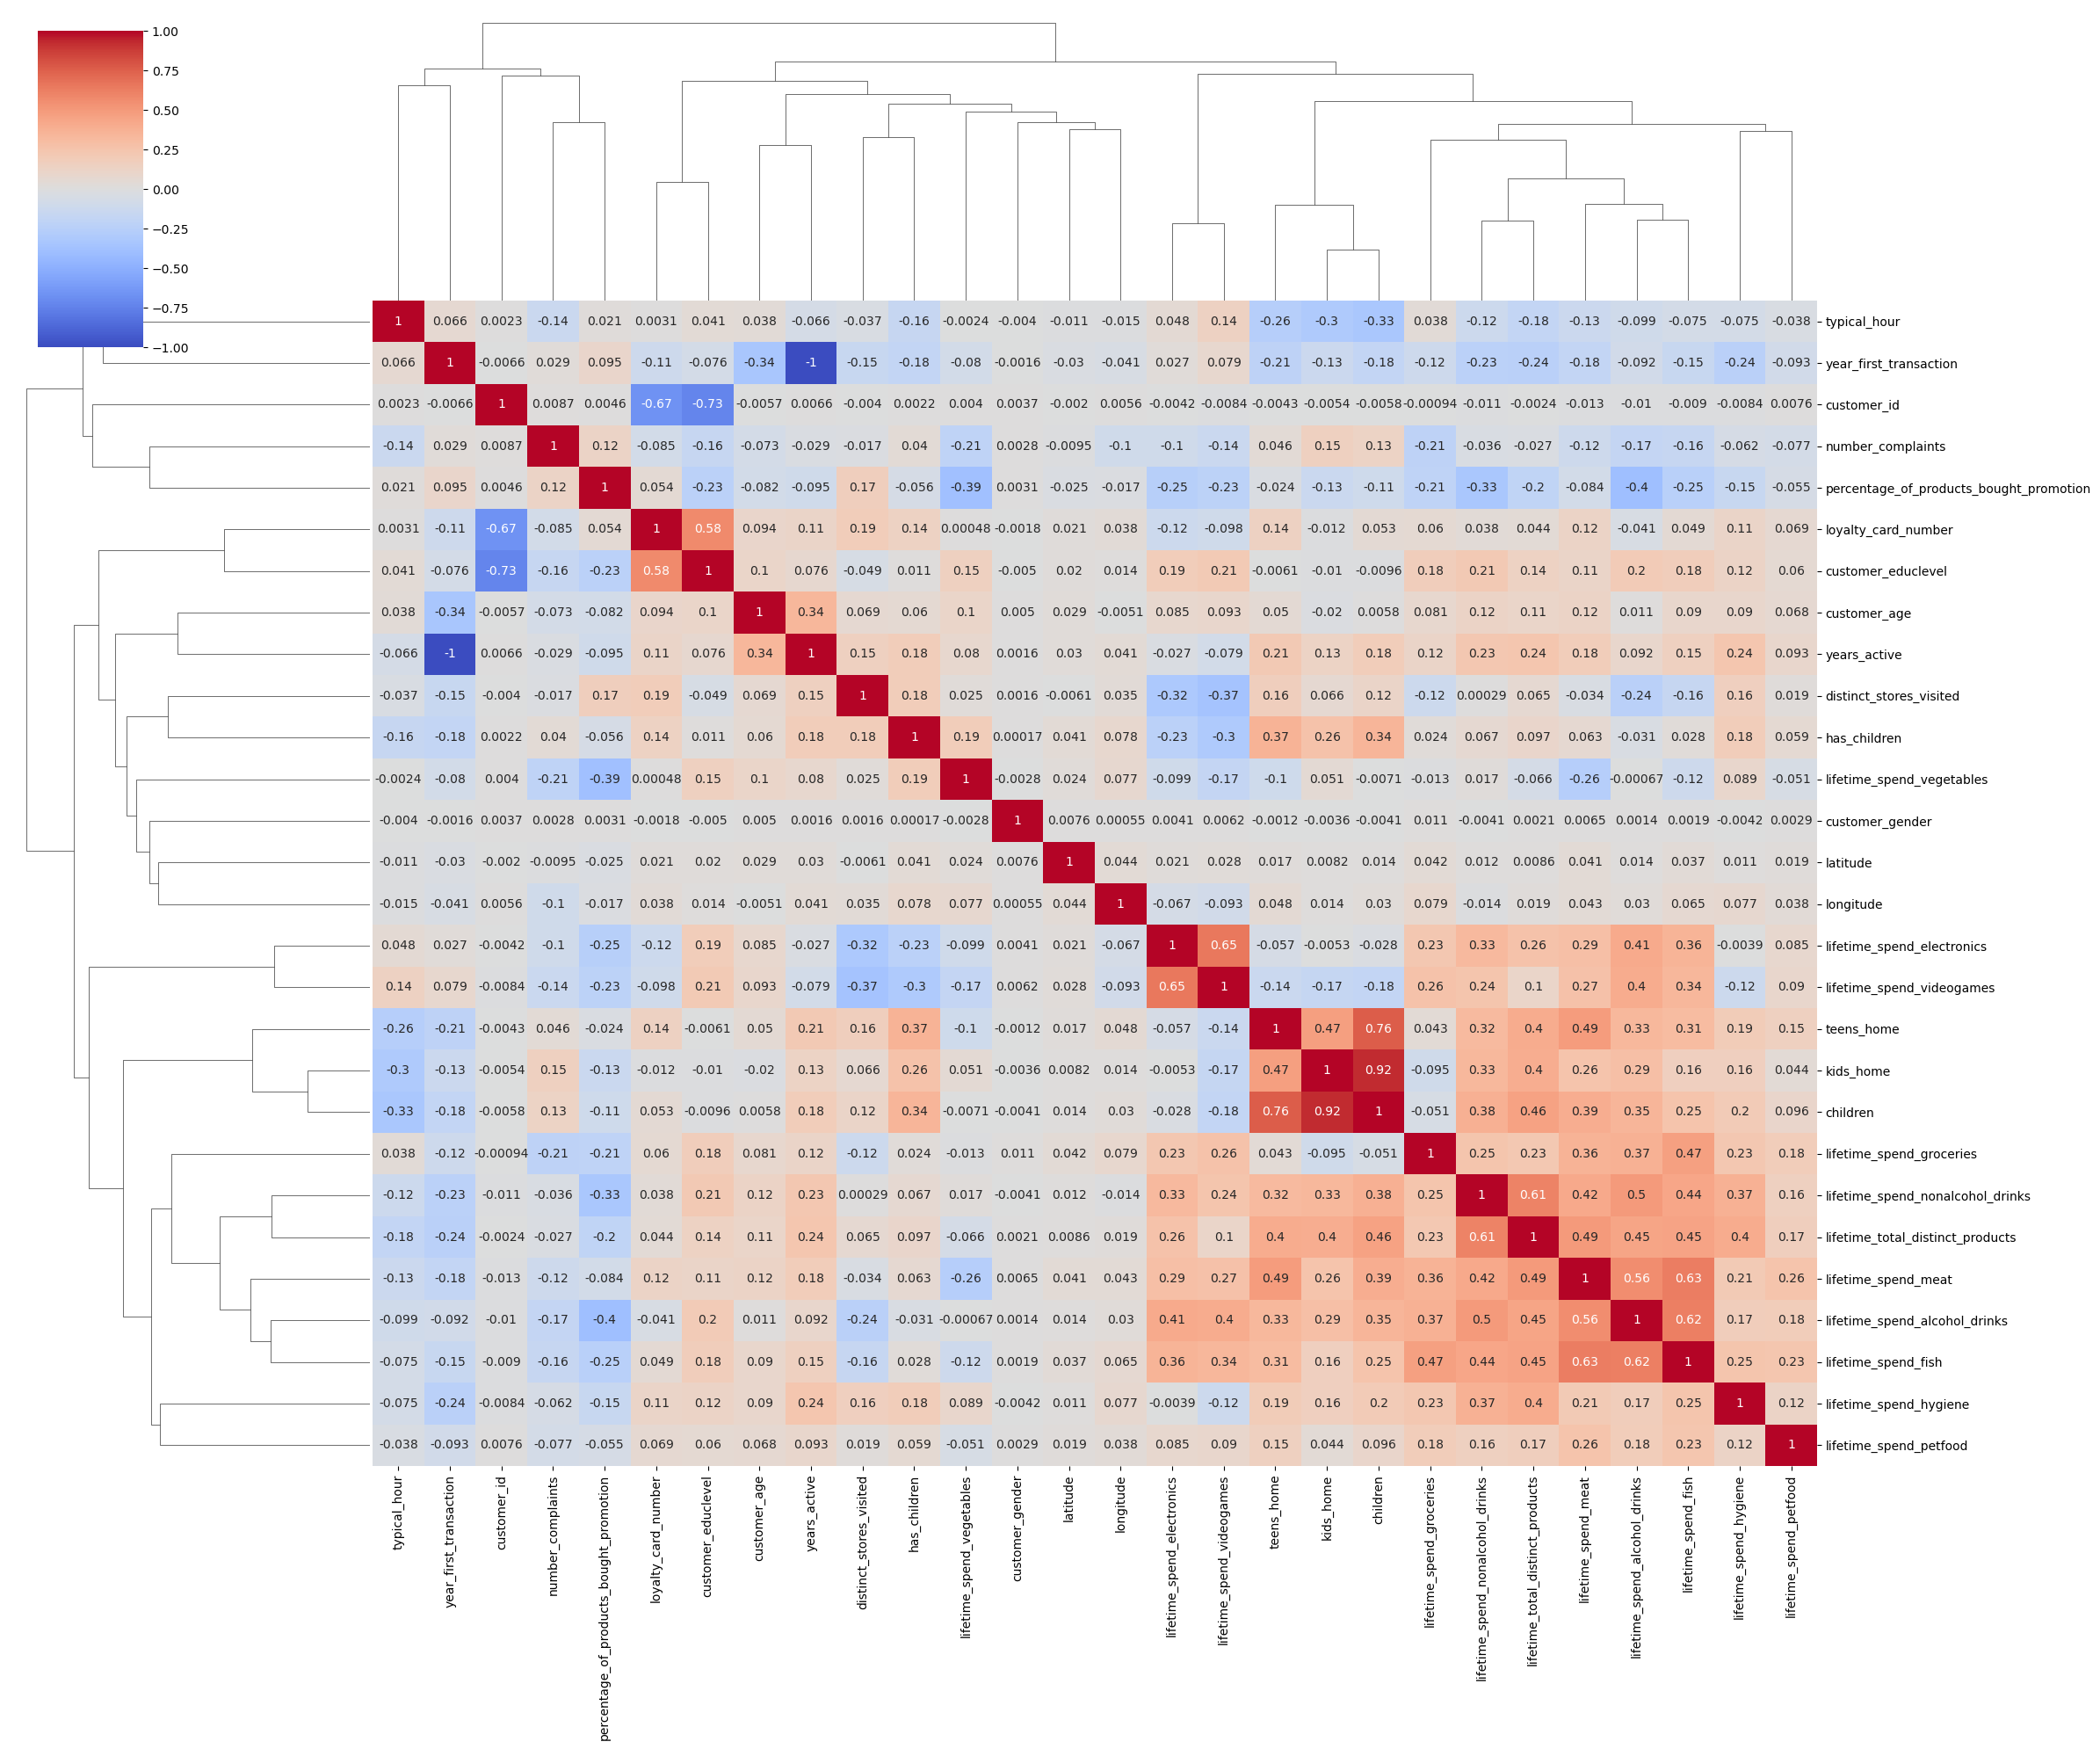

In [19]:
sns.clustermap(df.corr(), cmap='coolwarm', annot=True, figsize=(24,20))